In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.read_excel(r"D:\Decision Tree\heart_disease.xlsx")


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [6]:
df = pd.read_excel(r"D:\Decision Tree\heart_disease.xlsx", sheet_name = 'Heart_disease')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [12]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [13]:
# Fill null values with zero
df['oldpeak'].fillna(0, inplace=True)

In [27]:
df.duplicated().value_counts()

False    907
True       1
dtype: int64

In [28]:
df = df.drop_duplicates()

In [29]:
df.duplicated().value_counts()

False    907
dtype: int64

In [30]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.831312,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.079761,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.200000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [31]:
df.describe(include=object)

,sex,cp,restecg,exang,slope,thal
count,907,907,907,907,907,907
unique,2,4,3,4,3,3
top,Male,asymptomatic,normal,False,flat,normal
freq,717,495,542,516,453,385


C:\Users\PC\AppData\Local\Temp\ipykernel_12748\2328094327.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

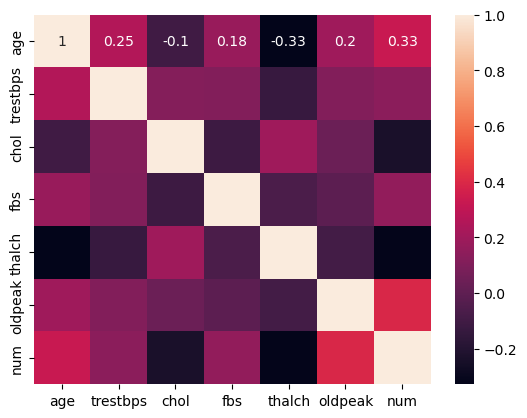

In [32]:
figuresize = ()
sns.heatmap(df.corr(), annot=True)

# plotting distributions

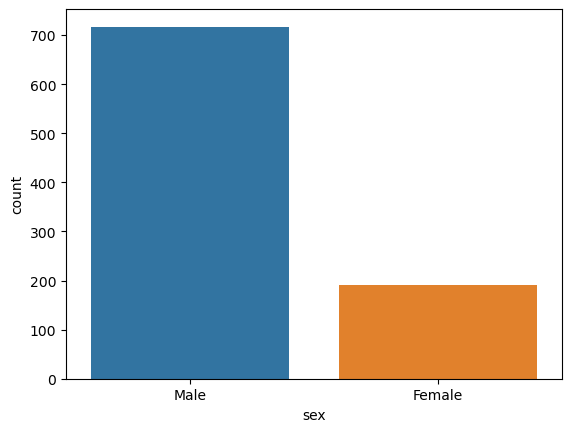

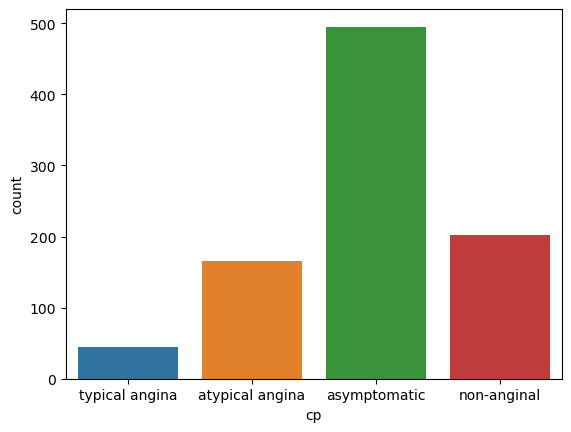

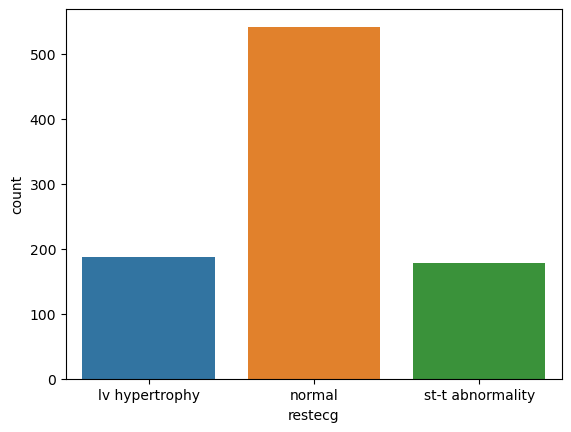

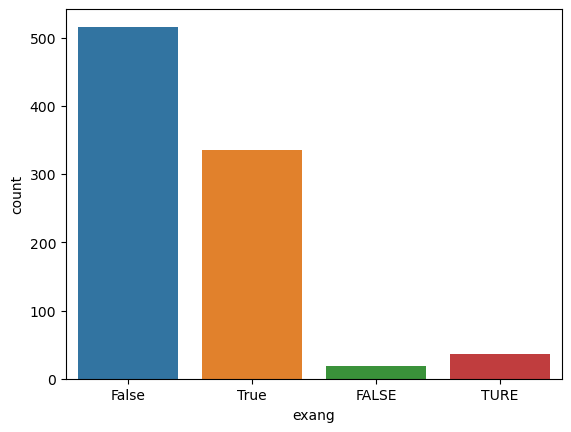

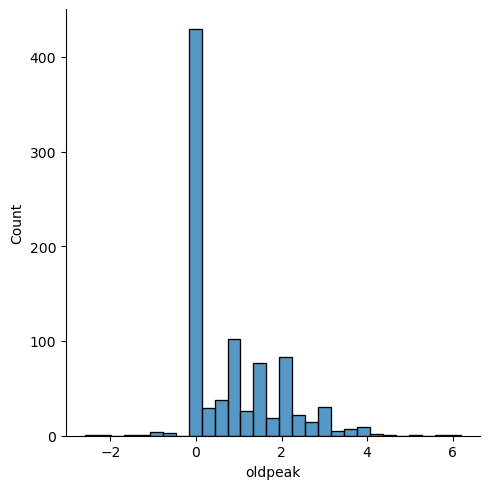

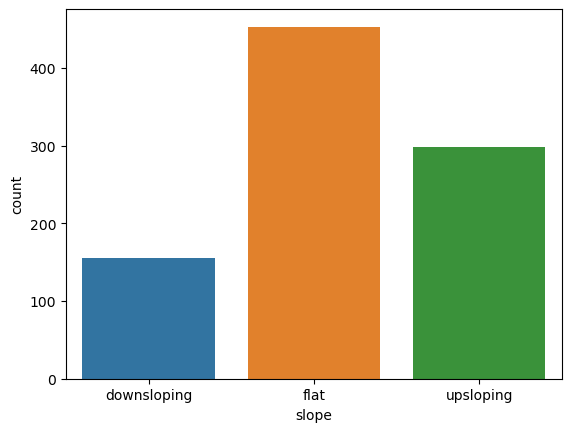

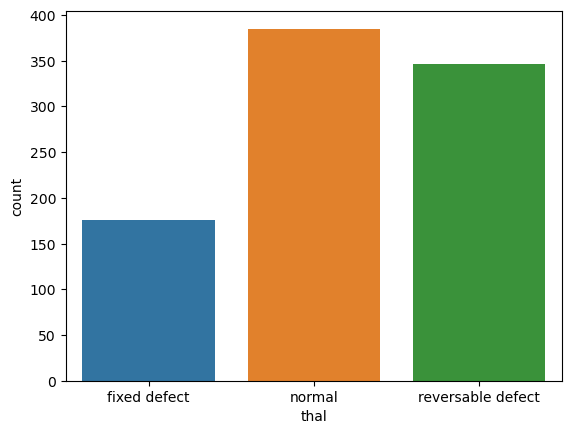

In [46]:
for feat in df.columns:
  if (df[feat].dtype == 'int') or (df[feat].dtype == 'float'):
    sns.displot(data = df, x=feat)
    plt.show()
  elif df[feat].dtype == 'object':
    sns.countplot(data = df, x=feat)
    plt.show()

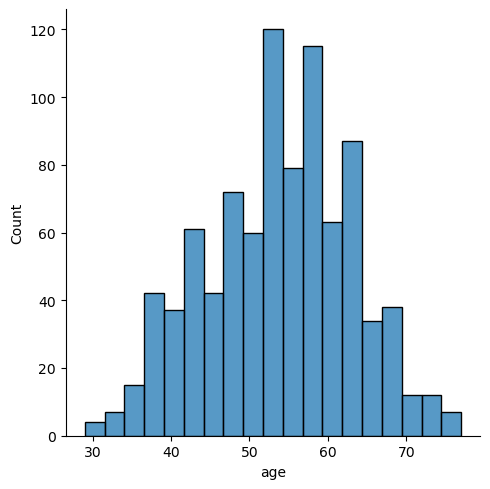

In [49]:
sns.displot(df['age'])

# plotting bivariate relationships

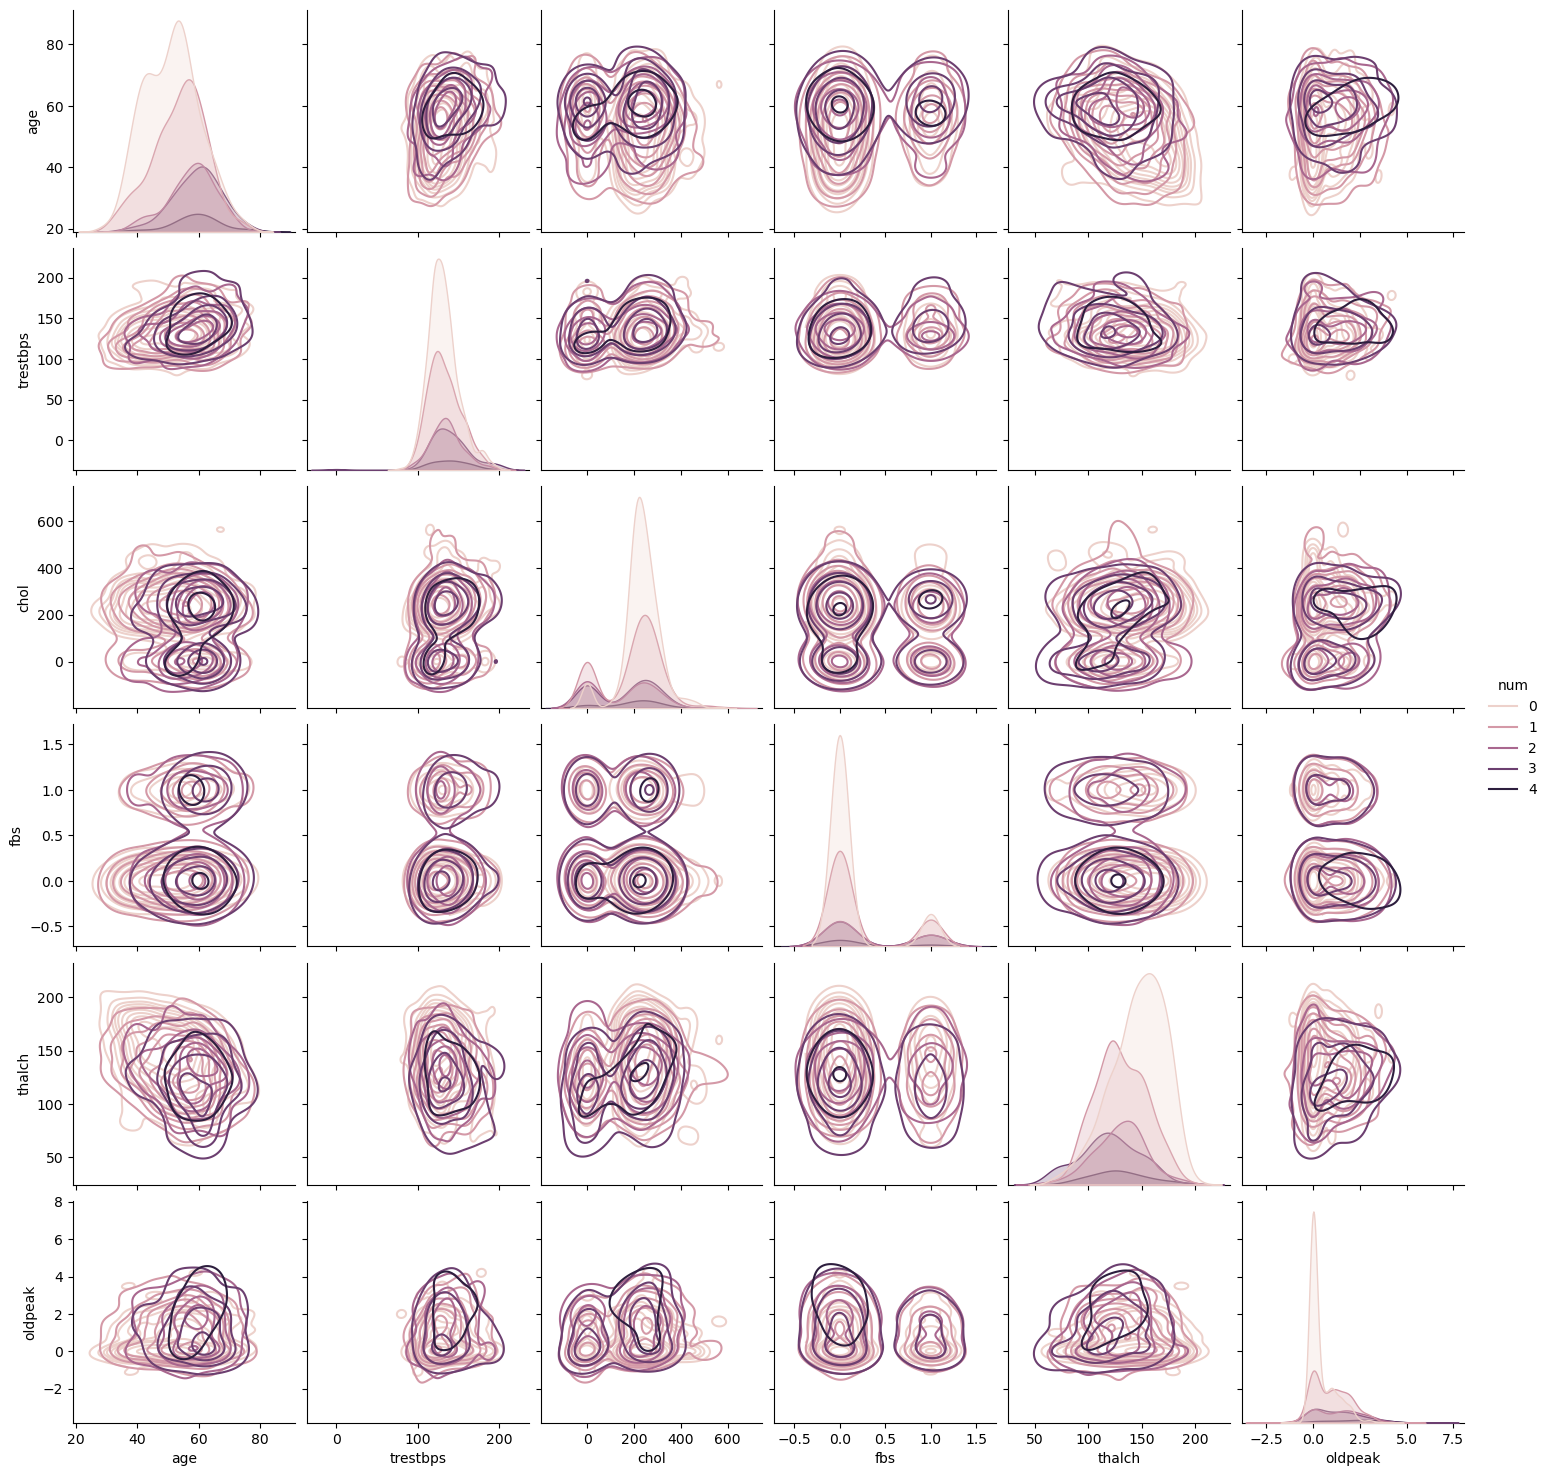

In [50]:
sns.pairplot(data=df, hue='num', kind='kde')


# Outlier handling

In [51]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0


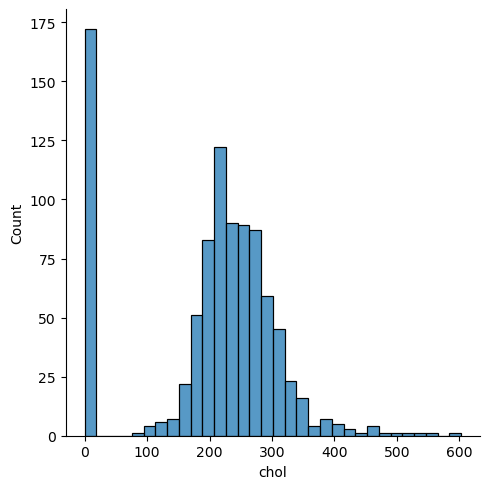

In [52]:
sns.displot(data = df, x = 'chol')

In [54]:
df['chol'] = df['chol'].clip(upper = 475)

C:\Users\PC\AppData\Local\Temp\ipykernel_12748\2800364371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chol'] = df['chol'].clip(upper = 475)


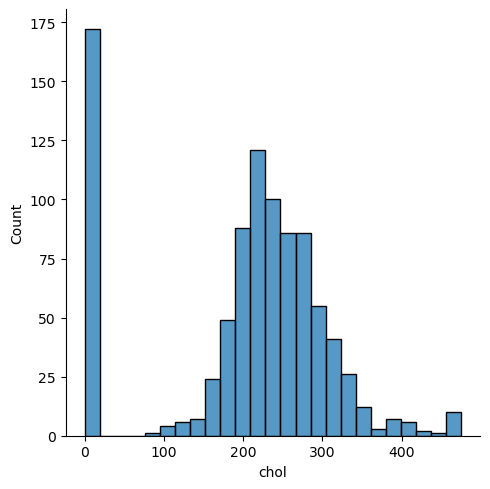

In [55]:
sns.displot(data = df, x = 'chol')

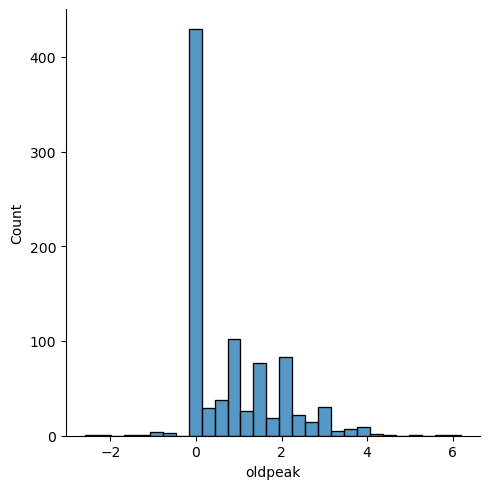

In [57]:
sns.displot(data = df, x = 'oldpeak')

In [60]:
df['oldpeak'] = df['oldpeak'].clip(lower = -1.2 , upper = 4.5)

C:\Users\PC\AppData\Local\Temp\ipykernel_12748\309615067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oldpeak'] = df['oldpeak'].clip(lower = -1.2 , upper = 4.5)


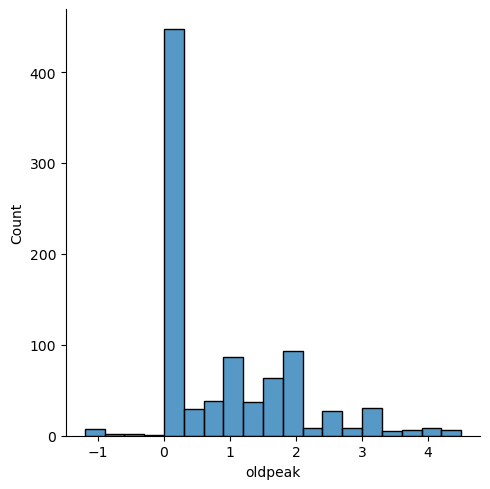

In [61]:
sns.displot(data = df, x = 'oldpeak')

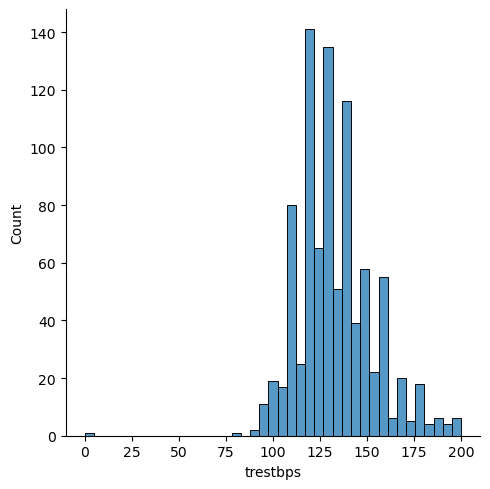

In [62]:
sns.displot(data = df, x = 'trestbps')

In [64]:
df['trestbps'] = df['trestbps'].clip(lower = 75)

C:\Users\PC\AppData\Local\Temp\ipykernel_12748\2576478094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trestbps'] = df['trestbps'].clip(lower = 75)


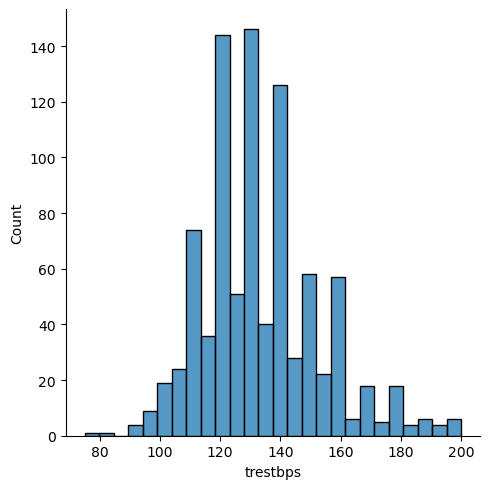

In [65]:
sns.displot(data = df, x = 'trestbps')

<Axes: >

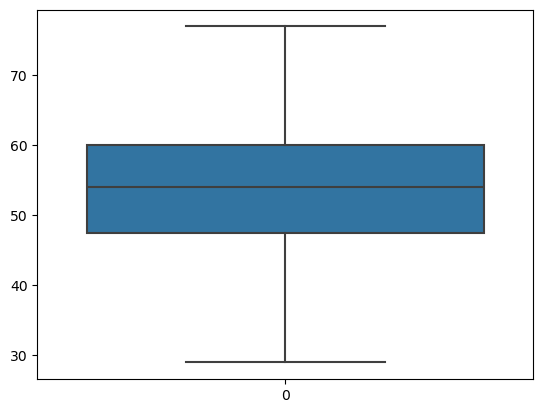


# Feature Engineering:

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 125.3+ KB


In [75]:
category = 'sex', 'cp', 'restecg' , 'exang', 'slope','thal'
df = pd.get_dummies(df, columns= ['sex', 'cp', 'restecg' , 'exang', 'slope','thal'])

In [76]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_False',
       'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

# Decision Tree Classification:

In [77]:
df.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,False,132,0.0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,False,148,0.4,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,False,190,0.0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,False,126,1.5,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [79]:
target = df['num']

In [81]:
df.drop('num', axis = 1, inplace = True)

In [83]:
x = df
y = target

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [86]:
x_train

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
84,42,120,295,False,162,0.0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
10,30,170,237,False,170,0.0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
616,58,160,211,True,92,0.0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
250,41,104,0,False,111,0.0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
478,64,142,276,False,140,1.0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,63,135,252,False,172,0.0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
270,37,120,260,False,130,0.0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
861,55,172,260,False,73,2.0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
435,57,154,232,False,164,0.0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0


In [87]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
treemodel = DecisionTreeClassifier(max_depth=2)

In [139]:
 model = treemodel.fit(x_train,y_train)

[Text(0.5, 0.8333333333333334, 'x[8] <= 0.5\ngini = 0.696\nsamples = 725\nvalue = [310, 218, 88, 90, 19]'),
 Text(0.25, 0.5, 'x[2] <= 118.5\ngini = 0.472\nsamples = 320\nvalue = [224, 57, 17, 19, 3]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.768\nsamples = 39\nvalue = [8, 11, 10, 8, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.38\nsamples = 281\nvalue = [216, 46, 7, 11, 1]'),
 Text(0.75, 0.5, 'x[16] <= 0.5\ngini = 0.734\nsamples = 405\nvalue = [86, 161, 71, 71, 16]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.733\nsamples = 181\nvalue = [63, 56, 32, 24, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.693\nsamples = 224\nvalue = [23, 105, 39, 47, 10]')]

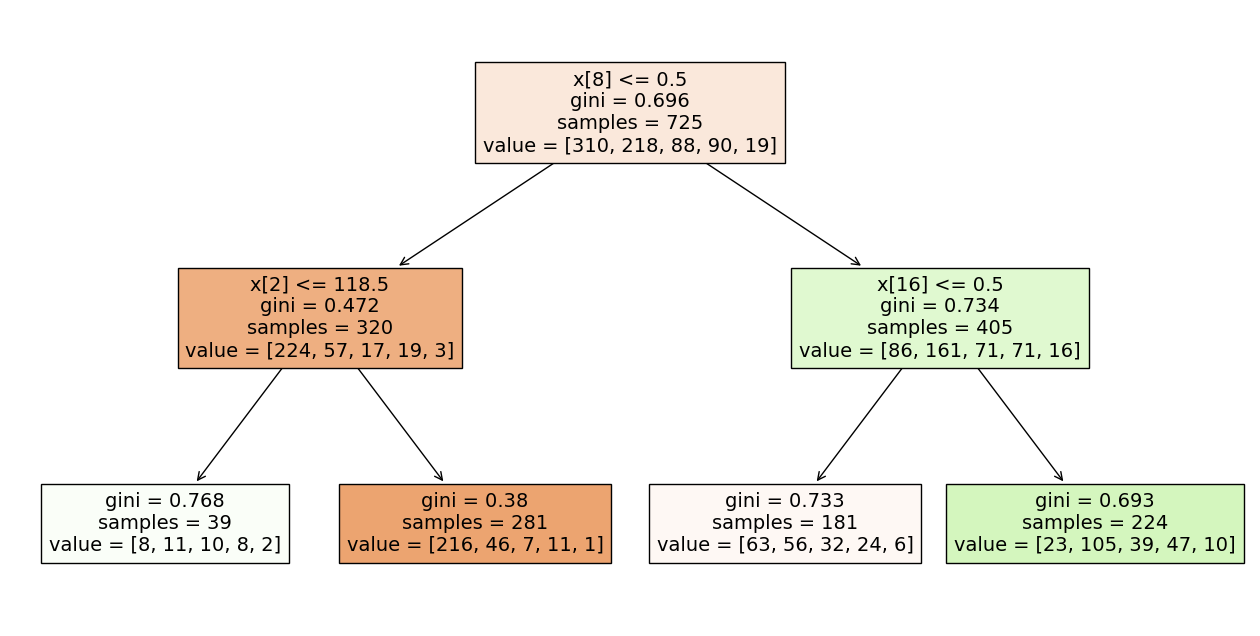

In [140]:
from sklearn import tree
plt.figure(figsize=(16,8))
tree.plot_tree(model,filled = True)

In [111]:
#prediction

y_pred = treemodel.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0,
       1, 1, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [113]:
from sklearn.metrics import classification_report, accuracy_score

In [116]:
accuracy_score(y_test, y_pred)

0.5769230769230769

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        89
           1       0.42      0.57      0.49        47
           2       0.00      0.00      0.00        20
           3       0.09      0.06      0.07        17
           4       0.00      0.00      0.00         9

    accuracy                           0.58       182
   macro avg       0.25      0.30      0.27       182
weighted avg       0.47      0.58      0.52       182



D:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
#parameter = { 'criterion' : ['gini', 'entropy', 'log_loss'],
             # 'splitter' :['best', 'random'],
            #  'max_depth' : [1,2,3,4,5],
             #' max_features' : ['auto', 'sqrt' , 'log2']}

In [123]:
parameter = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto' , 'sqrt' , 'log2']
}

In [124]:
from sklearn.model_selection  import GridSearchCV

In [125]:
treemodel = DecisionTreeClassifier(max_depth= 2)

cv = GridSearchCV(treemodel , param_grid= parameter , cv = 10 , scoring= 'accuracy')

In [141]:
model1 = cv.fit(x_train , y_train)

D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda

D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda

D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda

D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda

D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda

D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda

D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda

D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\Users\PC\anaconda

In [142]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [143]:
cv.best_score_

0.5586377473363774

In [144]:
y_pred1 = cv.predict(x_test)

In [145]:
accuracy_score(y_test, y_pred)

0.5769230769230769

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        89
           1       0.42      0.57      0.49        47
           2       0.00      0.00      0.00        20
           3       0.09      0.06      0.07        17
           4       0.00      0.00      0.00         9

    accuracy                           0.58       182
   macro avg       0.25      0.30      0.27       182
weighted avg       0.47      0.58      0.52       182



D:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
best_model = model1.best_estimator_

[Text(0.5072115384615384, 0.9166666666666666, 'x[15] <= 0.5\ngini = 0.696\nsamples = 725\nvalue = [310, 218, 88, 90, 19]'),
 Text(0.2548076923076923, 0.75, 'x[8] <= 0.5\ngini = 0.728\nsamples = 321\nvalue = [60, 132, 52, 64, 13]'),
 Text(0.125, 0.5833333333333334, 'x[4] <= 150.5\ngini = 0.702\nsamples = 75\nvalue = [32, 21, 8, 12, 2]'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[0] <= 64.5\ngini = 0.719\nsamples = 60\nvalue = [20, 21, 7, 11, 1]'),
 Text(0.038461538461538464, 0.25, 'x[7] <= 0.5\ngini = 0.705\nsamples = 50\nvalue = [14, 21, 6, 8, 1]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.49\nsamples = 7\nvalue = [4, 3, 0, 0, 0]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.716\nsamples = 43\nvalue = [10, 18, 6, 8, 1]'),
 Text(0.11538461538461539, 0.25, 'x[5] <= 1.45\ngini = 0.54\nsamples = 10\nvalue = [6, 0, 1, 3, 0]'),
 Text(0.09615384615384616, 0.08333333333333333, 'gini = 0.406\nsamples = 8\nvalue = [6, 0, 1, 1, 0]'),
 Text(0.1346153846153

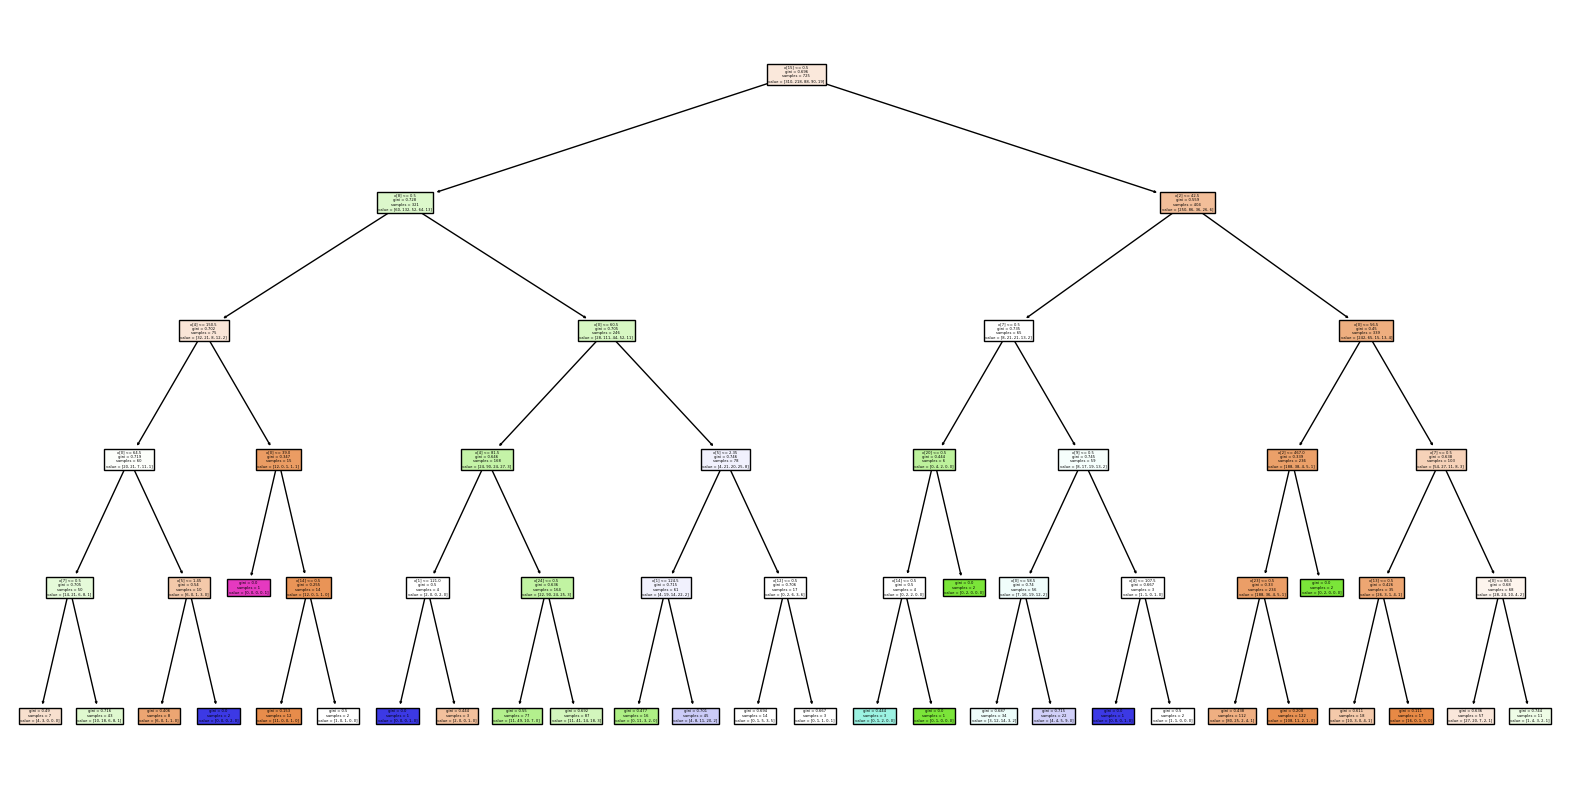

In [151]:
plt.figure(figsize=(20,10))
tree.plot_tree(best_model,filled = True)